In [35]:
# Visuals and pre-processing 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Model Creation
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn import tree


#For cross-validation
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

# 1.1  Data Pre-processing (Understand Dataset and handle null values)

In [36]:
# Load dataset (update the file path as needed)
df = pd.read_csv('/Users/beatrice/Desktop/DAC-Curriculum/datasets/data.csv')

# Inspect the data
print(df.head())
print(df.info())
print(df.describe())


   Bankrupt?   ROA(C) before interest and depreciation before interest  \
0          1                                           0.370594          
1          1                                           0.464291          
2          1                                           0.426071          
3          1                                           0.399844          
4          1                                           0.465022          

    ROA(A) before interest and % after tax  \
0                                 0.424389   
1                                 0.538214   
2                                 0.499019   
3                                 0.451265   
4                                 0.538432   

    ROA(B) before interest and depreciation after tax  \
0                                           0.405750    
1                                           0.516730    
2                                           0.472295    
3                                           0.4577

In [37]:
x = df.drop(columns=['Bankrupt?'])  # target variable
y = df['Bankrupt?']


In [38]:
x_train, x_test, y_train, y_test = train_test_split(x, y,test_size=0.2, random_state=42)

# 2.1 Create Decision Tree Model

Accuracy of Model = 0.964


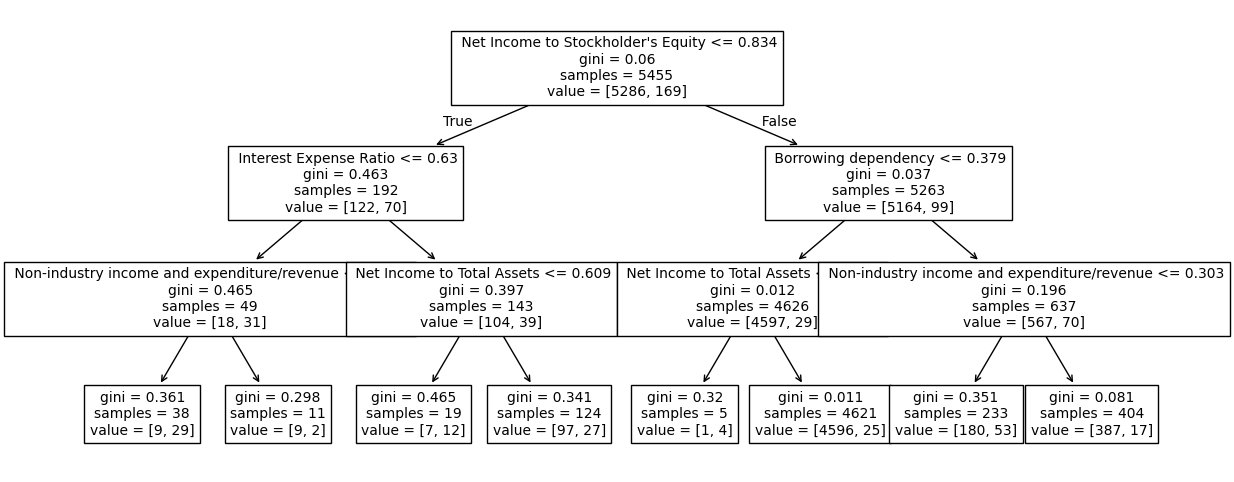

In [39]:
# Initialize the DecisionTreeClassifier
model = DecisionTreeClassifier(max_depth=3)
model.fit(x_train, y_train)

# Estimate the class of validation date.
y_pred = model.predict(x_test)

# Measure the accuracy for validation data
accuracy = (y_test == y_pred).mean()
print('Accuracy of Model = {:.3f}'.format(accuracy))

# Visualize the tree
# plt.figure(figsize=(20,10))
feat_names = x.columns.tolist()
plt.figure(figsize=(14,6))
tree.plot_tree(model, feature_names = feat_names, fontsize=10)
plt.show()

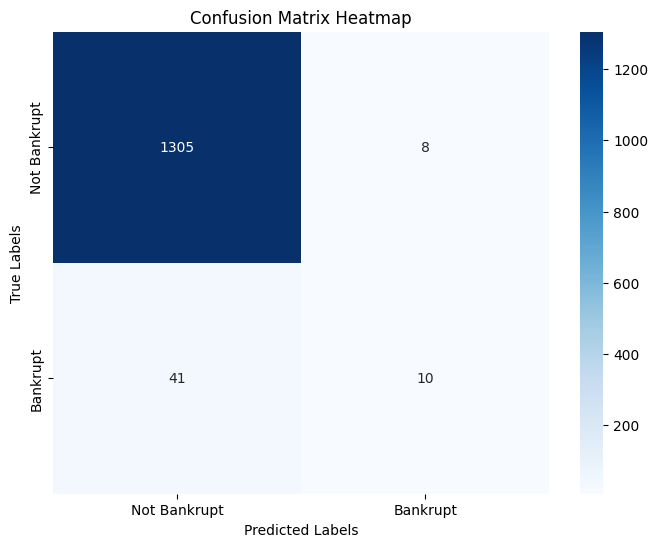

In [40]:
from sklearn.metrics import confusion_matrix
# Assuming y_test and y_pred are your true and predicted labels
cm = confusion_matrix(y_test, y_pred)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Bankrupt', 'Bankrupt'], yticklabels=['Not Bankrupt', 'Bankrupt'])
plt.title('Confusion Matrix Heatmap')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# 2.2 Create Decision Tree Model (Display the 3 Reports)

- Despite a high accuracy, the model fails to predict almost all actual positive cases.
- The F1 score is much lower, reflecting the poor performance on the minority class. (bankrupt)

In [41]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score

print("Accuracy:", accuracy_score(y_test, y_pred))
print("F1:", f1_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.9640762463343109
F1: 0.2898550724637681
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98      1313
           1       0.56      0.20      0.29        51

    accuracy                           0.96      1364
   macro avg       0.76      0.59      0.64      1364
weighted avg       0.95      0.96      0.96      1364

Confusion Matrix:
 [[1305    8]
 [  41   10]]


# 3.1 Feature Importance (Understand optimal depth)

Depth = 1, train_acc = 0.9690, eval_acc = 0.9545
Depth = 2, train_acc = 0.9714, eval_acc = 0.9516
Depth = 3, train_acc = 0.9742, eval_acc = 0.9545
Depth = 4, train_acc = 0.9769, eval_acc = 0.9516
Depth = 5, train_acc = 0.9811, eval_acc = 0.9531
Depth = 6, train_acc = 0.9852, eval_acc = 0.9575
Depth = 7, train_acc = 0.9899, eval_acc = 0.9531
Depth = 8, train_acc = 0.9927, eval_acc = 0.9604


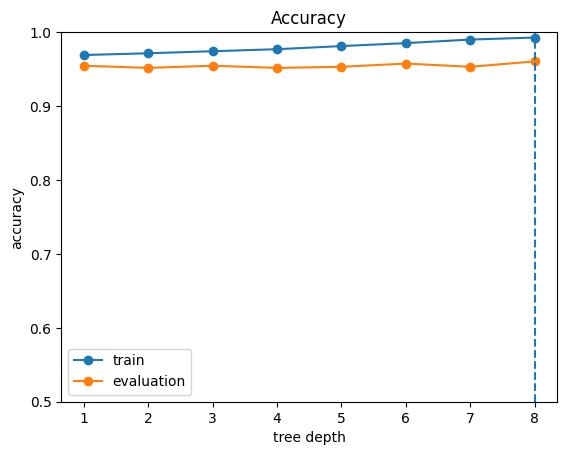

In [42]:
# Split the data into training, validation and test data.
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=42)

x_test, x_eval, y_test, y_eval = train_test_split(x_test, y_test, test_size = 0.5, random_state=42)

# Create decision tree models of various depths, 
# and measure the accuracy of validation data for each model.
train_acc = []
eval_acc = []
max_depth = 8
for d in range(1, max_depth+1):
    model = DecisionTreeClassifier(max_depth=d, random_state = 42)
    model.fit(x_train, y_train)
    
    # Measure the accuracy of this model using the training data.
    y_pred = model.predict(x_train)
    train_acc.append((y_pred == y_train).mean())

    # Measure the accuracy of this model using the validation data.
    y_pred = model.predict(x_eval)
    eval_acc.append((y_pred == y_eval).mean())
    print('Depth = {}, train_acc = {:.4f}, eval_acc = {:.4f}'\
          .format(d, train_acc[-1], eval_acc[-1]))

# Find the optimal depth with the highest accuracy of validation data.
opt_depth = np.argmax(eval_acc) + 1

# Visualize accuracy changes as depth changes.
plt.plot(train_acc, marker='o', label='train')
plt.plot(eval_acc, marker='o', label='evaluation')
plt.legend()
plt.title('Accuracy')
plt.xlabel('tree depth')
plt.ylabel('accuracy')
plt.xticks(np.arange(max_depth), np.arange(1, max_depth+1))
plt.axvline(x=opt_depth-1, ls='--')
plt.ylim(0.5, 1.0)
plt.show()

# 3.2 Feature Importance (Depth Adjustment)

Optimal depth = 8, test_acc = 0.9560


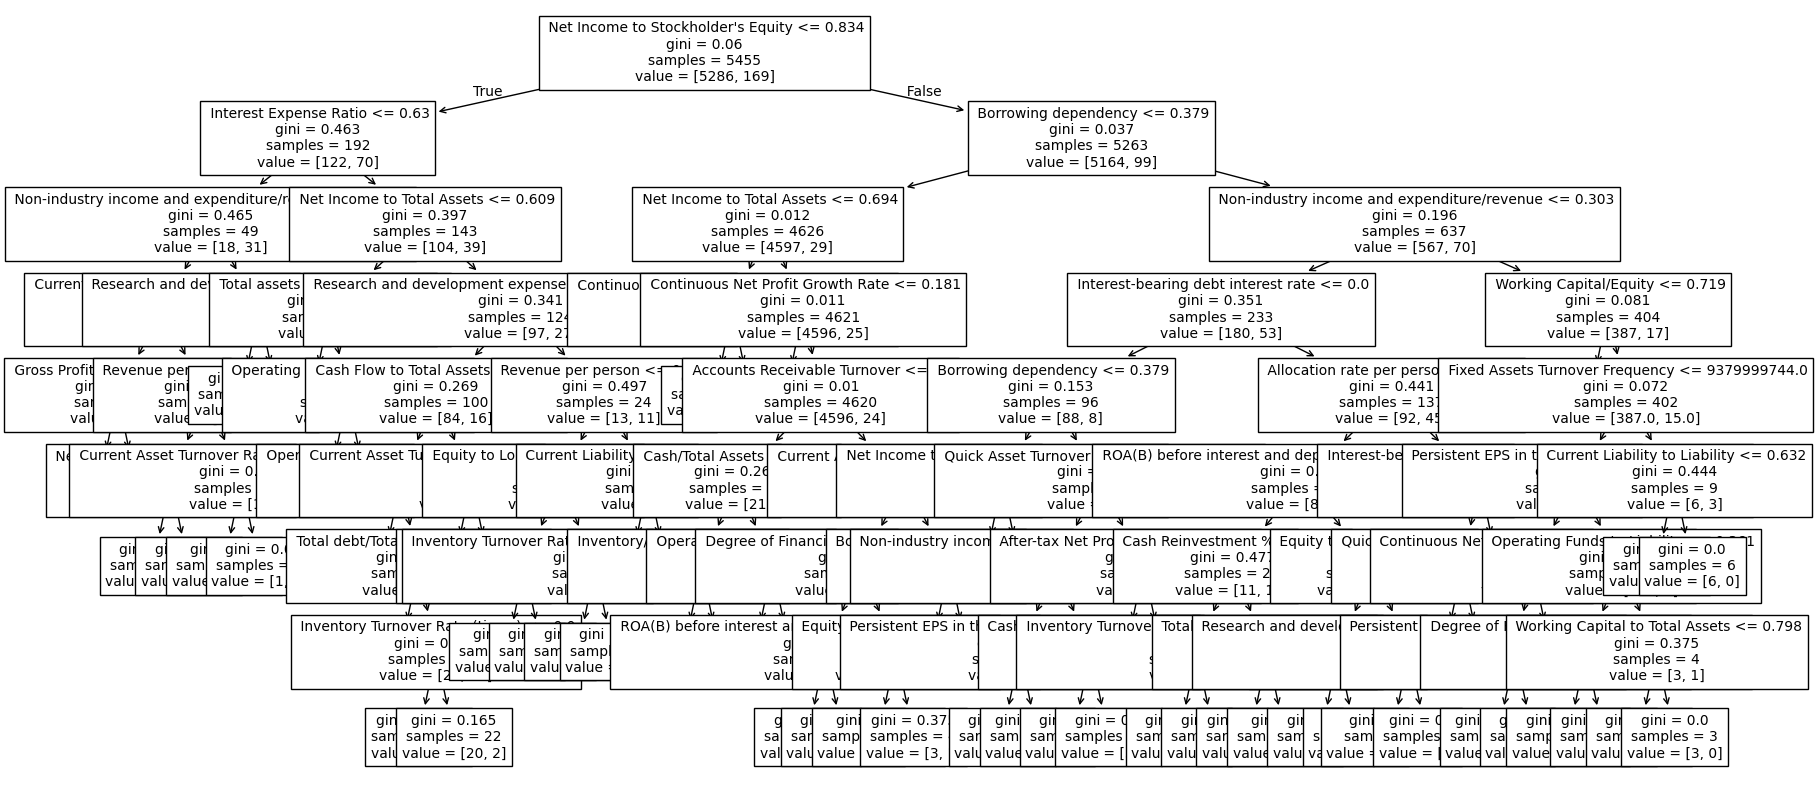

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98       662
           1       0.22      0.20      0.21        20

    accuracy                           0.96       682
   macro avg       0.60      0.59      0.59       682
weighted avg       0.95      0.96      0.95       682



In [43]:
# I set max_depth=2 as a constant value for tree visualization.
model = DecisionTreeClassifier(max_depth=8, random_state = 42)
model.fit(x_train, y_train)

# Use test data to evaluate final performance.
y_pred = model.predict(x_test)
test_acc = (y_pred == y_test).mean()
print('Optimal depth = {}, test_acc = {:.4f}'.format(opt_depth, test_acc))
        
# Visualize the tree

feat_names = x.columns.tolist()
plt.figure(figsize=(21,10))
tree.plot_tree(model, feature_names = feat_names, fontsize=10)
plt.show()

print("Classification Report:\n", classification_report(y_test, y_pred))

# 3.3 Feature Importance (Understanding Top 20 Important Features)

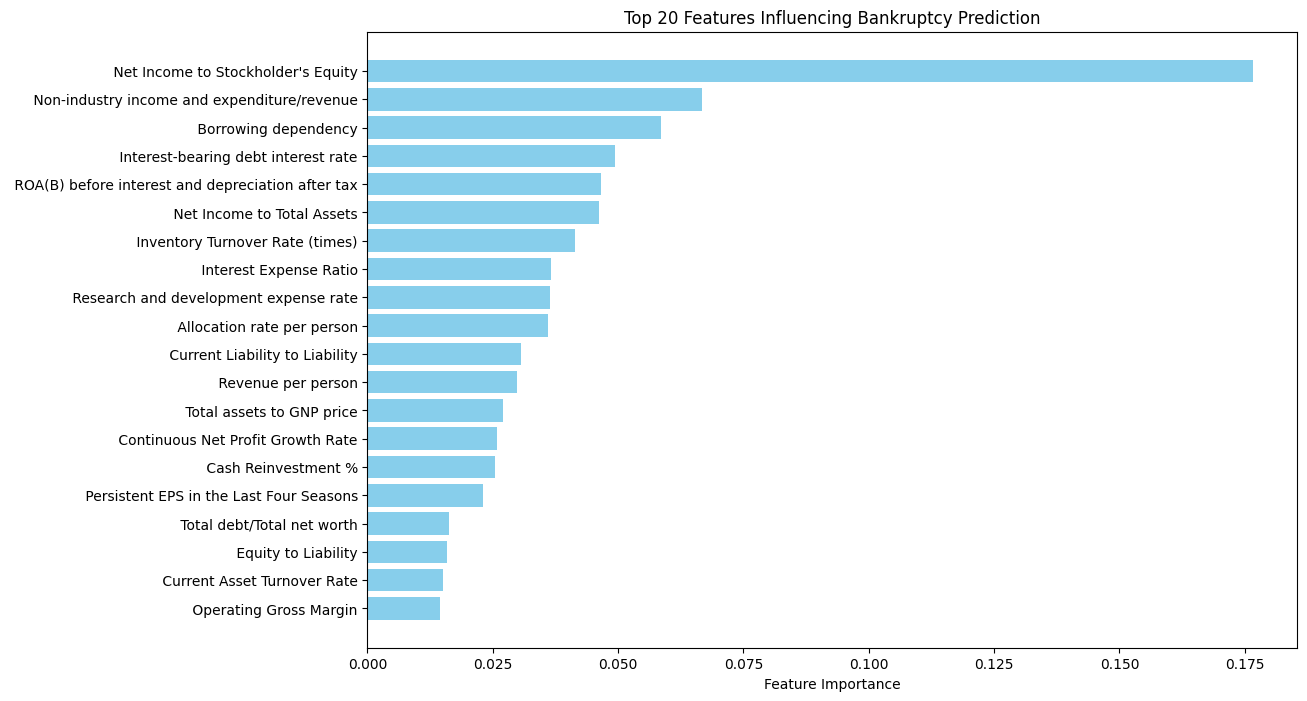

In [44]:
# Extract and sort the most important features
from sklearn.tree import DecisionTreeClassifier
dt_optimized = DecisionTreeClassifier(max_depth=8, random_state=42)
dt_optimized.fit(x_train, y_train)

importances = dt_optimized.feature_importances_  # Feature importance from your Decision Tree
features = x.columns

# Create and sort a DataFrame for feature importance
importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Focus on the top 20 features
top_features = importance_df.head(20)

# Plot
plt.figure(figsize=(12, 8))
plt.barh(top_features['Feature'], top_features['Importance'], color='skyblue')
plt.gca().invert_yaxis()
plt.title('Top 20 Features Influencing Bankruptcy Prediction')
plt.xlabel('Feature Importance')
plt.show()



# 4. Cross-Validation (Stratified K-fold)

In [45]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

# Generate a sample imbalanced dataset
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, weights=[0.8, 0.2], random_state=42)

# Initialize the StratifiedKFold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Model
model = RandomForestClassifier(random_state=42)

# Perform Stratified K-Fold Cross-Validation
fold = 1
f1_scores = []

for train_index, val_index in skf.split(X, y):
    # Split the data into training and validation sets
    X_train, X_val = X[train_index], X[val_index]
    y_train, y_val = y[train_index], y[val_index]
    
    # Train the model
    model.fit(X_train, y_train)
    
    # Validate the model
    y_pred = model.predict(X_val)
    f1 = f1_score(y_val, y_pred)
    f1_scores.append(f1)
    
    print(f"Fold {fold} - F1 Score: {f1:.4f}")
    fold += 1

# Overall performance
print(f"Mean F1 Score: {sum(f1_scores) / len(f1_scores):.4f}")

Fold 1 - F1 Score: 0.7246
Fold 2 - F1 Score: 0.8718
Fold 3 - F1 Score: 0.8974
Fold 4 - F1 Score: 0.7945
Fold 5 - F1 Score: 0.8333
Mean F1 Score: 0.8243


In [48]:
# Initialize the RandomForestClassifier
model = RandomForestClassifier(max_depth=3, random_state=42, n_estimators=40)
model.fit(x_train, y_train)

# Estimate the class of validation data
y_pred = model.predict(x_test)

# Measure the accuracy for validation data
accuracy = (y_test == y_pred).mean()
print('Accuracy of Model = {:.3f}'.format(accuracy))

# Visualize a single decision tree from the Random Forest
feat_names = x.columns.tolist()
plt.figure(figsize=(14, 6))
# Access the first tree in the forest
tree_to_plot = model.estimators_[0]  # First tree in the forest
plot_tree(tree_to_plot, feature_names=feat_names, fontsize=10, filled=True, rounded=True)
plt.title("Visualization of a Single Tree in the Random Forest")
plt.show()

ValueError: Found input variables with inconsistent numbers of samples: [5455, 800]